Question 1:

In [3]:
paperThickness = 1
everestHeight = 8848
numberOfFolds = 0
#convert 1mm to 1m
paperThicknessInMeters = paperThickness/1000

# Because we don't want to surpass the height of everest, we add a check for it 
while((paperThicknessInMeters*2)<everestHeight):
    # since the thickness of the paper doubles exponentially, 
    # we multiply the thickness by 2
    paperThicknessInMeters*=2
    numberOfFolds+=1    
    
# the number of folds it would take to exceed the height of mount everest would be
# the current number of folds plus one, since the current number does not exceed 
# the height of mt. everest
print("Total number of folds required to exceed mount everest: ", numberOfFolds+1)


23
Total number of folds required to exceed mount everest:  24


Question 2:

In [132]:
# to use the exp method
import math

initial_vol = 10000
time_spent=0
half_life = initial_vol/2
current_d_vol = initial_vol
# condition checks to see if the current volume of water is more than
# half of the initial volume
while(current_d_vol>half_life):
    # here we apply the water exponential decay formula
    current_d_vol = initial_vol*math.exp(-0.1*time_spent)
    # for each iteration we increase our time counter
    time_spent+=1
    
print(time_spent)

8


Question 3:

In [24]:
# to utilize the trunc method
import math

deposit = 100
annualized_interest_rate = 0.05
months_in_year = 12
max_interest_years =5
current_year=1

while(current_year<=max_interest_years): 
    # here we apply the compound interest formula 
    annualized_interest_after_year=deposit*(1+(annualized_interest_rate/months_in_year))**(months_in_year*current_year)
    
    print(str(math.trunc(annualized_interest_after_year)))
    current_year+=1


105
110
116
122
128


Question 4:

In [33]:
# to utilize the trunc method
import math

car_value = 20_000
monthly_interest = 0.01
loan_term = 1
max_loan_term = 3
monthly_payment = 0

while(loan_term<=max_loan_term):
    # get the total number of payments for the current loan term 
    total_number_of_payments = 12*loan_term
    
    # apply the loan payment formula
    monthly_payment =(car_value*monthly_interest)/(1-(1+monthly_interest)**-total_number_of_payments)
    
    print(math.trunc(monthly_payment))
    loan_term+=1    


1776
941
664


Question 5:

Text(0.5, 1.0, 'Graph show profits from investment and breakeven day')

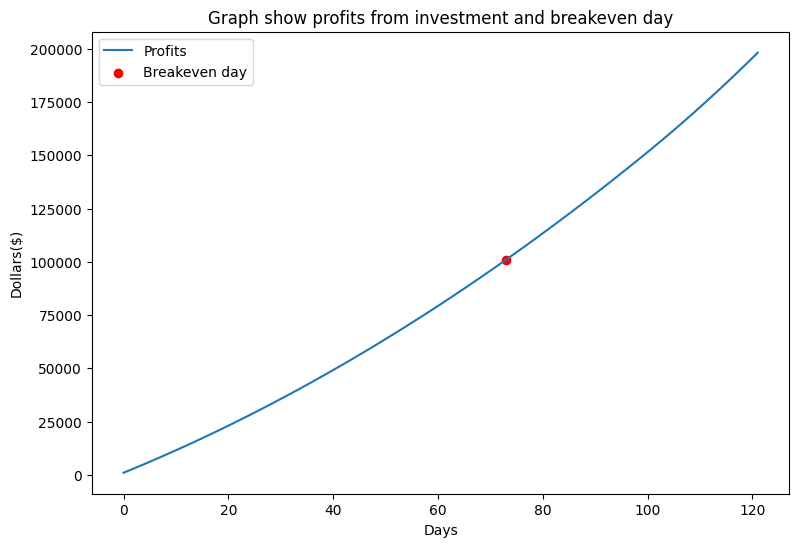

In [232]:
# to use the trunc method
import math
# to use the dataframe method
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt

initial_customers = 100
initial_investment = 100_000
growth_rate = 0.01
daily_customer_profits = 10
customers = initial_customers
profits = 0

# first day profits
profits = daily_customer_profits*customers
days_past=1

days_vs_profits = {"Days":[],"Profits":[]}

# print(customers*(2**growth_rate))
# print(customers*(1+growth_rate)**2)
    
while(profits < 200_000):
    customers = math.trunc(customers + (customers*growth_rate))
    days_vs_profits["Days"].append(days_past)
    days_vs_profits["Profits"].append(profits)
    # print("Day: "+ str(days_past)+" | Profit: " + str(profits))
    profits += customers*daily_customer_profits
    days_past+=1



# for day,profit in days_vs_profits.items():
#     print(day,profit)
        
df = pd.DataFrame(data=days_vs_profits)

mask = df['Profits'] > 100_000
threshold = df.loc[mask].head(1).index

# print(df.head(5))
plt.figure(figsize=(9,6))
plt.plot(df.index, df['Profits'], label="Profits")
plt.scatter(threshold, df.loc[threshold, 'Profits'], color='red', label="Breakeven day", marker='o')
plt.xlabel("Days")
plt.ylabel("Dollars($)")
plt.legend()
plt.title("Graph show profits from investment and breakeven day")
# plt.yticks([50000],[''])
# plt.show()
# df.plot(x[2],y[2], linestyle='--', marker='*', color='g')
# print(days_past)

# Give titles to graphs including legends


Question 6:

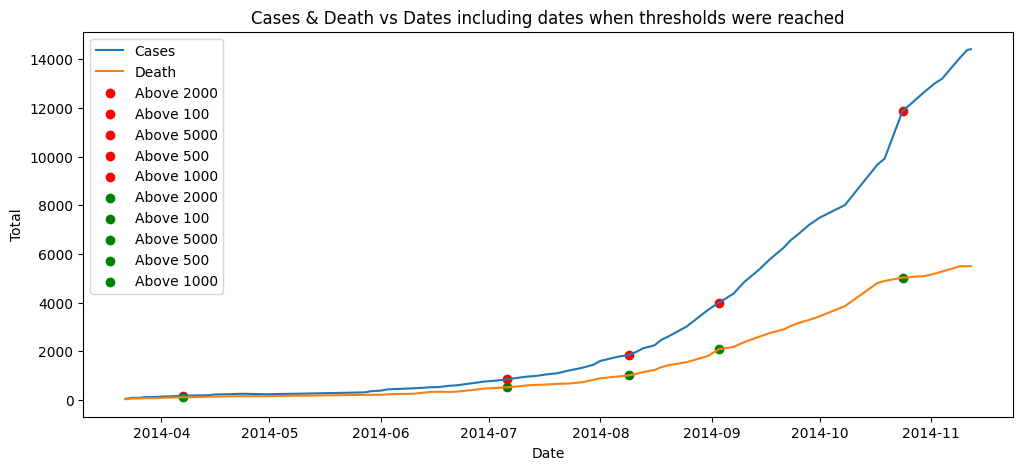

In [373]:
# to use the read_excel method
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("data/ebola_download.xls", usecols="B,C,A")
# print(df)
df["Date"]=pd.to_datetime(df["Date"])
min_date = df["Date"].min()
max_date = df['Date'].max()
df.set_index('Date', inplace=True)

new_index = pd.date_range(start=min_date, end=max_date, freq='D')
resampled_df = df.reindex(new_index)
df_interpolated = resampled_df.interpolate(method='linear')

thresholds = {
    100,
    500,
    1000,
    2000,
    5000
}

cases_first_occurrences={}
deaths_first_occurrences={}

for threshold in thresholds:
    mask = df['Cases'] > threshold
    if mask.any():
        first_index = df.loc[mask].head(1).index[0]
        cases_first_occurrences[threshold] = first_index

for threshold in thresholds:
    mask = df['Death'] > threshold
    if mask.any():
        first_index = df.loc[mask].head(1).index[0]
        cases_first_occurrences[threshold] = first_index

plt.figure(figsize=(12,5))
plt.plot(df_interpolated.index, df_interpolated['Cases'], label="Cases")
plt.plot(df_interpolated.index, df_interpolated['Death'], label="Death")
for threshold in thresholds:
    plt.scatter(cases_first_occurrences[threshold], df.loc[cases_first_occurrences[threshold],'Cases'], color='red', label="Above " + str(threshold), marker="o")

for threshold in thresholds:
    plt.scatter(cases_first_occurrences[threshold], df.loc[cases_first_occurrences[threshold],'Death'], color='green', label="Above " + str(threshold), marker="o")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Total")
plt.title("Cases & Death vs Dates including dates when thresholds were reached")
plt.show()

Question 7:

In [448]:
number_of_days = len(df_interpolated.index)
# print(number_of_days)

cases_diff = df_interpolated['Cases'].max() - df_interpolated['Cases'].min()
# print(cases_diff)
initial_case = df_interpolated['Cases'].head(1).values[0]
# print(initial_case)
average_cdaily_growth = (cases_diff/number_of_days)
# print(average_cdaily_growth)
perc_case_cgrowth = average_cdaily_growth*(100/initial_case)
print("Death Percentage Daily Growth: "+str(int(perc_case_cgrowth))+"%")


death_diff = df_interpolated['Death'].max() - df_interpolated['Death'].min()
initial_death = df_interpolated['Death'].iloc[0]
# print(initial_death)
average_ddaily_growth = death_diff/number_of_days
# print(average_cdaily_growth)
perc_case_dgrowth = average_ddaily_growth*(100/initial_death)
print("Case Percentage Daily Growth: "+str(int(perc_case_dgrowth))+"%")


Death Percentage Daily Growth: 124%
Case Percentage Daily Growth: 79%


Question 8:

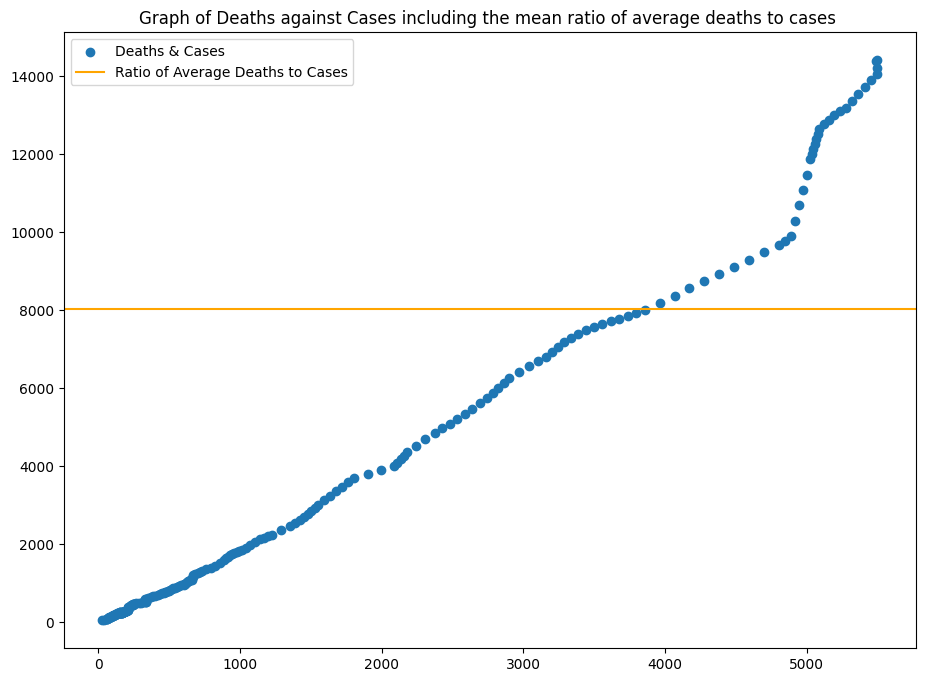

In [374]:
#to utilize plotting functions
import matplotlib.pyplot as plt

df_interpolated['Ratio'] = df_interpolated['Death']/df_interpolated['Cases']

avg_ratio = df_interpolated['Ratio'].mean()

plt.figure(figsize=(11,8))
plt.scatter(df_interpolated['Death'], df_interpolated['Cases'], label="Deaths & Cases")
plt.axhline(y=avg_ratio * df_interpolated['Cases'].max(), color='orange', linestyle='-', label="Ratio of Average Deaths to Cases")
plt.title("Graph of Deaths against Cases including the mean ratio of average deaths to cases ")
plt.legend()
plt.show()


Question 9:

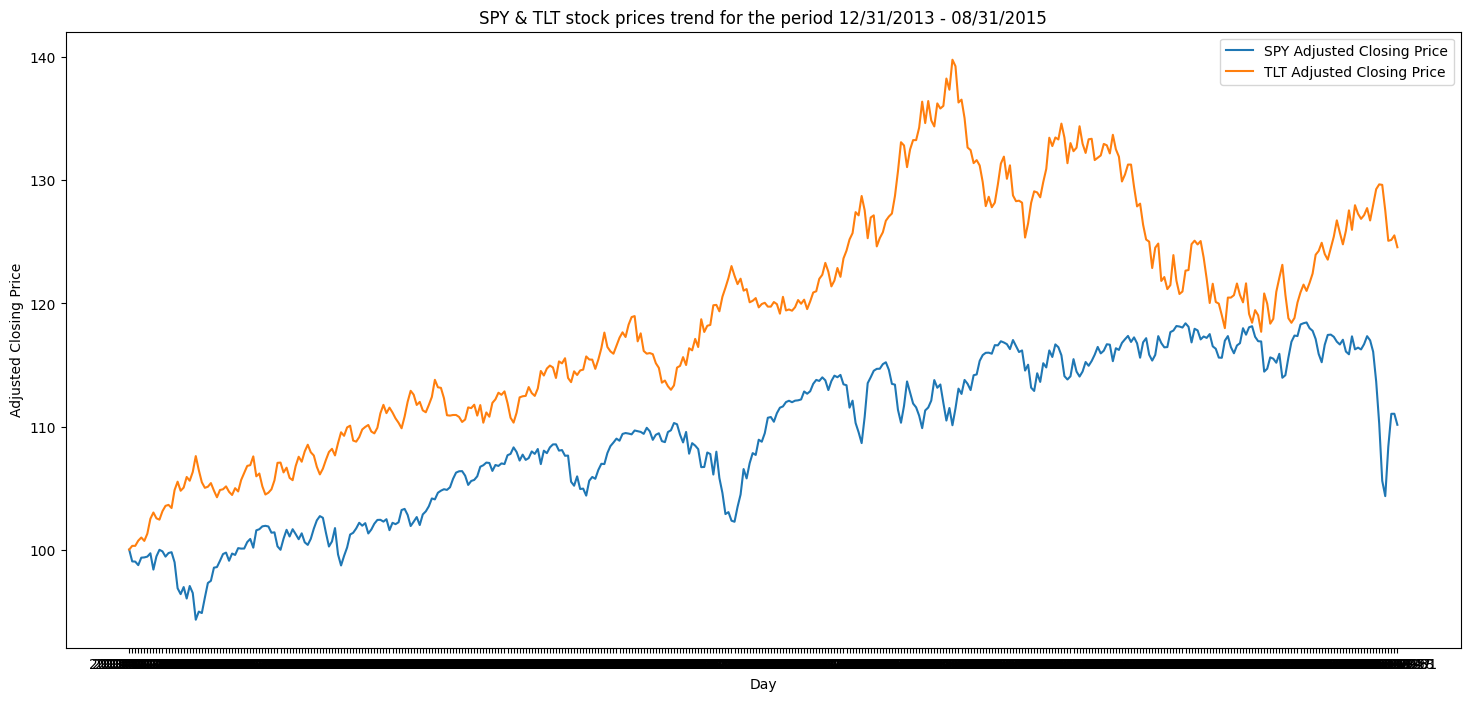

In [419]:
#to use the read_csv method
import pandas as pd
#to utilize plotting functions
import matplotlib.pyplot as plt

spy_df = pd.read_csv("data/SPY.csv", usecols=['Date','Adj Close'])
tlt_df = pd.read_csv("data/TLT.csv", usecols=['Date','Adj Close'])

spy_init_value = spy_df['Adj Close'].iloc[0]
spy_df['Adj Close'] = spy_df['Adj Close'].apply(lambda x: x * (100/spy_init_value))

tlt_init_value = tlt_df['Adj Close'].iloc[0]
tlt_df['Adj Close'] = tlt_df['Adj Close'].apply(lambda x: x * (100/tlt_init_value))

#consolidate necessary data into one data frame
eft_df = pd.DataFrame({
    'Date': spy_df['Date'],
    'Spy Adj Close': spy_df['Adj Close'],
    'Tlt Adj Close': tlt_df['Adj Close']
})
eft_df.set_index(eft_df['Date'], inplace=True)

plt.figure(figsize=(18,8))
plt.plot(eft_df.index, eft_df['Spy Adj Close'], label="SPY Adjusted Closing Price")
plt.plot(eft_df.index, eft_df['Tlt Adj Close'], label="TLT Adjusted Closing Price")
plt.xlabel('Day')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.title("SPY & TLT stock prices trend for the period 12/31/2013 - 08/31/2015")
plt.show()



Question 10:

In [447]:
eft_df['SPY Return'] = eft_df['Spy Adj Close'].pct_change()*100

mean = eft_df['SPY Return'].mean() *100
print("SPY Average Percentage: " + str(int(mean))+"%")

min = eft_df['SPY Return'].min() *100
print("SPY Min Daily Return Percentage: " + str(int(min))+"%")

max = eft_df['SPY Return'].max() *100
print("SPY Max Daily Return Percentage: " + str(int(max))+"%")

eft_df['TLT Return'] = eft_df['Tlt Adj Close'].pct_change()*100

mean = eft_df['TLT Return'].mean() *100
print("TLT Average Percentage: " + str(int(mean))+"%")

min = eft_df['TLT Return'].min() *100
print("TLT Min Daily Return Percentage: " + str(int(min))+"%")

max = eft_df['TLT Return'].max() *100
print("TLT Max Daily Return Percentage: " + str(int(max))+"%")

SPY Average Percentage: 2%
SPY Min Daily Return Percentage: -421%
SPY Max Daily Return Percentage: 383%
TLT Average Percentage: 5%
TLT Min Daily Return Percentage: -243%
TLT Max Daily Return Percentage: 264%
